In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.shape

(5000, 3)

In [5]:
X=df.drop('test_result',axis=1)

In [6]:
y=df['test_result']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
log_model=LogisticRegression()

In [12]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [13]:
log_model.coef_

array([[-0.07822906,  0.42695251]])

In [15]:
preds=log_model.predict(X_test)

In [16]:
preds

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [20]:
accuracy_score(y_test,preds)

0.9193333333333333

In [21]:
confusion_matrix(y_test,preds)

array([[516,  63],
       [ 58, 863]], dtype=int64)

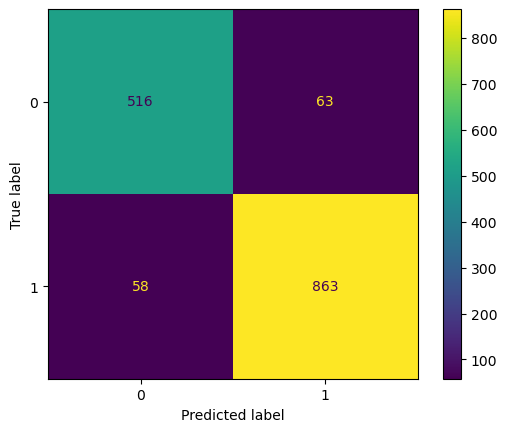

In [25]:
ConfusionMatrixDisplay.from_estimator(log_model,X_test,y_test);

In [26]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       579
           1       0.93      0.94      0.93       921

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.92      0.92      0.92      1500



In [27]:
from sklearn.metrics import precision_score,recall_score

In [28]:
precision_score(y_test,preds)

0.9319654427645788

In [29]:
recall_score(y_test,preds)

0.9370249728555917

In [36]:
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay

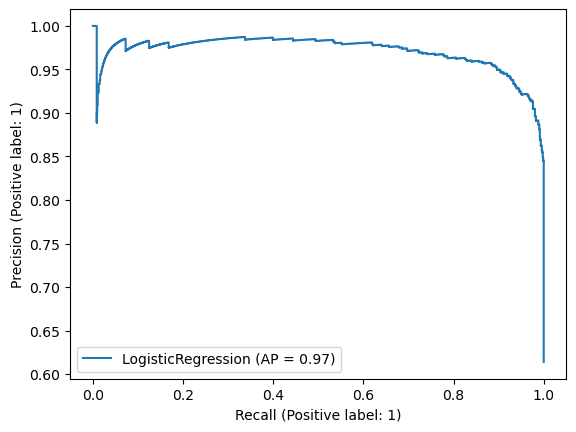

In [37]:
PrecisionRecallDisplay.from_estimator(log_model,X_test,y_test)

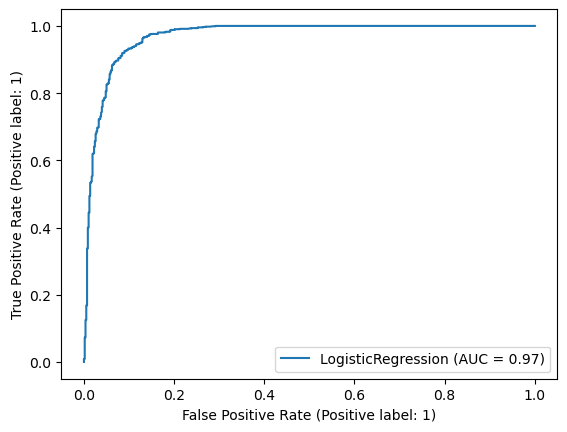

In [39]:
RocCurveDisplay.from_estimator(log_model,X_test,y_test);

In [50]:
log_model.predict_proba(X_test)[0]

array([0.82530858, 0.17469142])